## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [6]:
%matplotlib inline

In [7]:
import pymc3 as pm

In [8]:
# using pymc3 for bayesian stats
#number of tests (n) and results (k)
n = 100
k = 61

with pm.Model() as coin_context:
    # actual fraction of heads occuring (between 40-80 percent)
    p = pm.Uniform('p',0.40,0.80)
    # probability of kevents over ntrials 
    y = pm.Binomial('y',n=n,p=p,observed=k)
    #sample the parameters
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:23<00:00, 1772.48draws/s]
The acceptance probability does not match the target. It is 0.8841792888397405, but should be close to 0.8. Try to increase the number of tuning steps.


In [9]:
#summary of posterior
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.517,0.698,0.0,0.0,15623.0,15623.0,15653.0,22698.0,1.0


C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument bac

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007BFC6FDE88>,
      dtype=object)

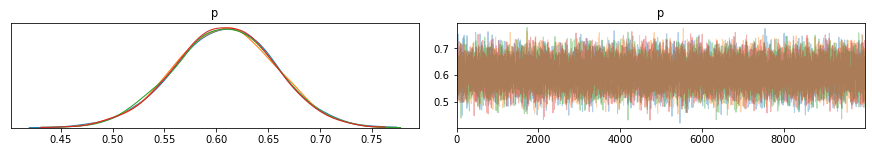

In [10]:
# two samplings run, plots considering all values of parameter p.
pm.traceplot(trace)

Applying above example to gapminder data

In [11]:
#csv import and downselect to 1985
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [13]:
#sort by age5_survicing val
gdata.sort_values('age5_surviving',inplace=True)

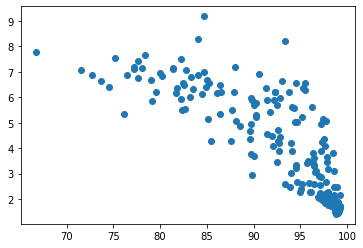

In [14]:
# quick simple plot, note downward trend.
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [15]:
# model with bayesian, consider visual above to set start val range for int and slope
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       #intercept + slope * explanatory param
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       #stand error
                       sd = 1,
                       #obs data
                       observed = gdata['babies_per_woman'])
    #sample
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:32<00:00, 1306.31draws/s]
The acceptance probability does not match the target. It is 0.8795398585175699, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8910488564091913, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9056193975517202, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [16]:
#summary
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,10.192,0.285,9.657,10.718,0.003,0.002,7853.0,7843.0,7820.0,8429.0,1.0
slope,-0.219,0.010,-0.239,-0.200,0.000,0.000,7846.0,7829.0,7817.0,8634.0,1.0


C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hailey\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument bac

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007B821E3908>,
      dtype=object)

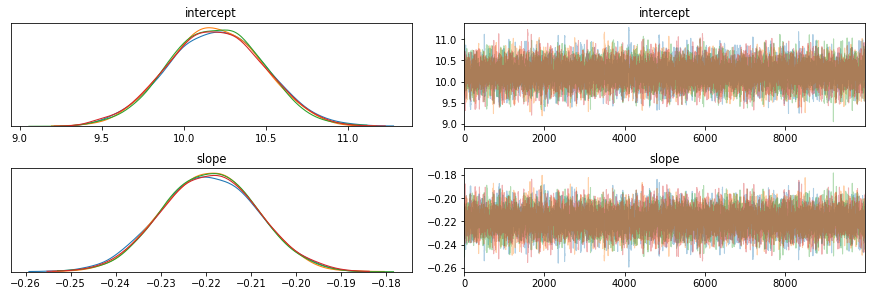

In [17]:
#trace plot
pm.traceplot(trace)

In [18]:
# evaluated at the mean of the posterior * explanatory param
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

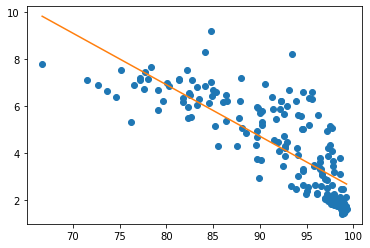

In [19]:
# plot the data and prediction
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

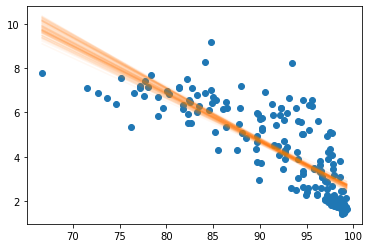

In [20]:
#each point in posterior corresponds to a slightly different model
#plot all together to visualize uncertainty
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)